# PART 1: PCA USING NUMPY

**Importing Important Libraries**

In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random

Defining a function that loads images from the input folder and stores it in a numpy array and outputs the shape

In [ ]:
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        if filename.endswith(".png"):
            img = cv2.imread(os.path.join(folder, filename))
            if img is not None:
                images.append(img)
    return images

def images_to_numpy_array(images):
    return np.array(images)

folder_path = "../train/train"
images = load_images_from_folder(folder_path)
numpy_array = images_to_numpy_array(images)

print("Shape of numpy array:", numpy_array.shape)

Shape of numpy array: (919, 256, 512, 3)


Randomly Showing any 5 images from the input data

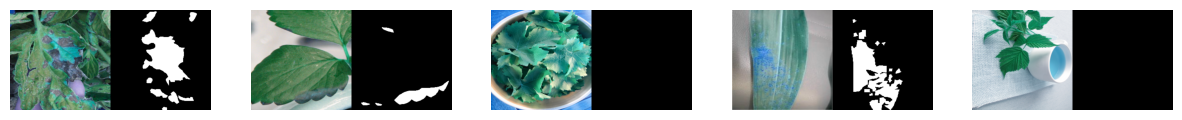

In [3]:
#Randomly show any 5 images side by side
fig, axs = plt.subplots(1, 5, figsize=(15, 15))
for i in range(5):
    random_index = random.randint(0, len(images))
    axs[i].imshow(images[random_index])
    axs[i].axis('off')
plt.show()

NOw cutting the images into two and showing them

Shape of left images numpy array: (919, 256, 256, 3)
Shape of right images numpy array: (919, 256, 256, 3)


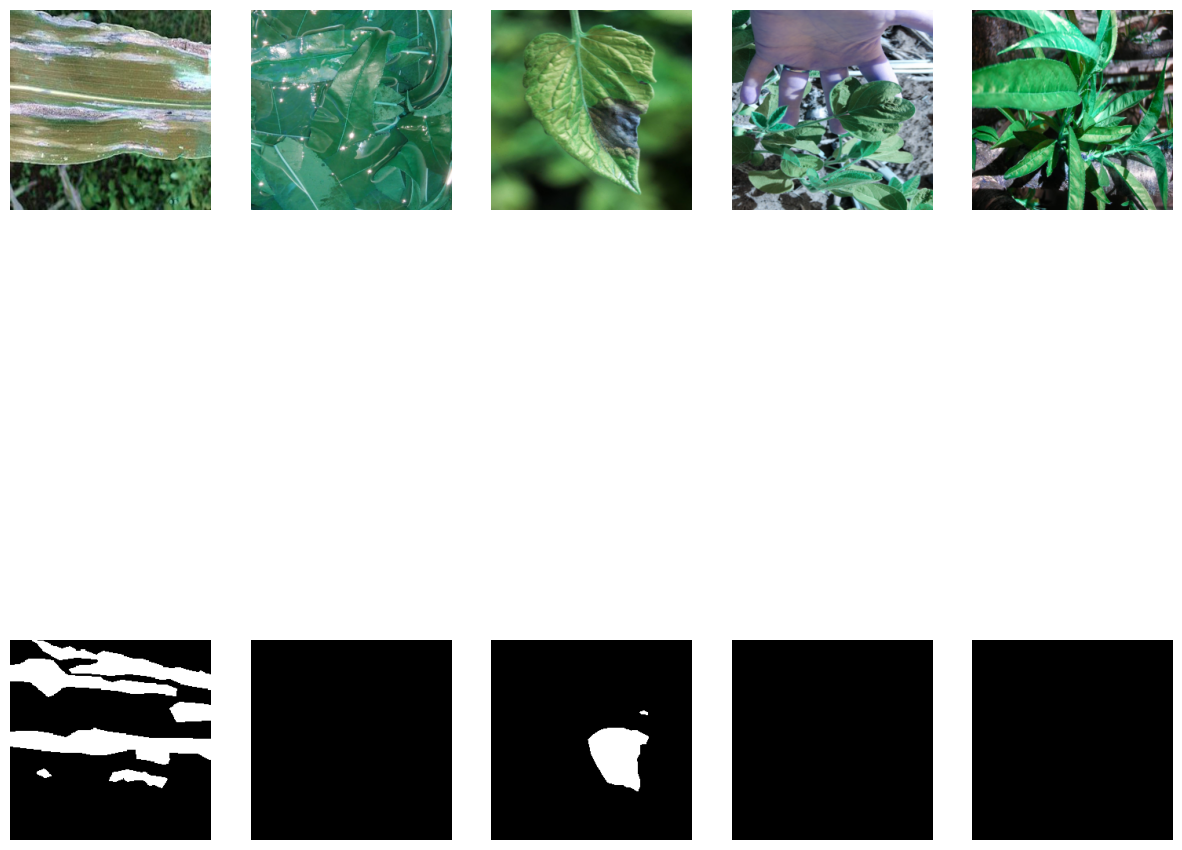

In [4]:
def cut_image(image):
    height, width, _ = image.shape
    half_width = width // 2
    left = image[:, :half_width]
    right = image[:, half_width:]
    return left, right

left_images = []
right_images = []
for image in images:
    left, right = cut_image(image)
    left_images.append(left)
    right_images.append(right)

left_images = np.array(left_images)
right_images = np.array(right_images)

print("Shape of left images numpy array:", left_images.shape)
print("Shape of right images numpy array:", right_images.shape)

#Randomly show 5 left images and 5 right images into two rows
fig, axs = plt.subplots(2, 5, figsize=(15, 15))
for i in range(5):
    random_index = random.randint(0, len(images)-1)
    axs[0, i].imshow(left_images[random_index])
    axs[0, i].axis('off')
    axs[1, i].imshow(right_images[random_index])
    axs[1, i].axis('off')
plt.show()

NOw using skimage to resize the images as the size of the images are very high definition. Resize from $256 \times 256$ to $32 \times 32$

In [5]:
#NOw resize the images to k x k size using skimage
from skimage.transform import resize

def resize_image(image, k):
    return resize(image, (k, k))

k = 32
left_images_resized = []
right_images_resized = []
for i in range(len(images)):
    left_resized = resize_image(left_images[i], k)
    right_resized = resize_image(right_images[i], k)
    left_images_resized.append(left_resized)
    right_images_resized.append(right_resized)

left_images_resized = np.array(left_images_resized)
right_images_resized = np.array(right_images_resized)

print("Shape of resized left images numpy array:", left_images_resized.shape)
print("Shape of resized right images numpy array:", right_images_resized.shape)

Shape of resized left images numpy array: (919, 32, 32, 3)
Shape of resized right images numpy array: (919, 32, 32, 3)


Now showing the resized images

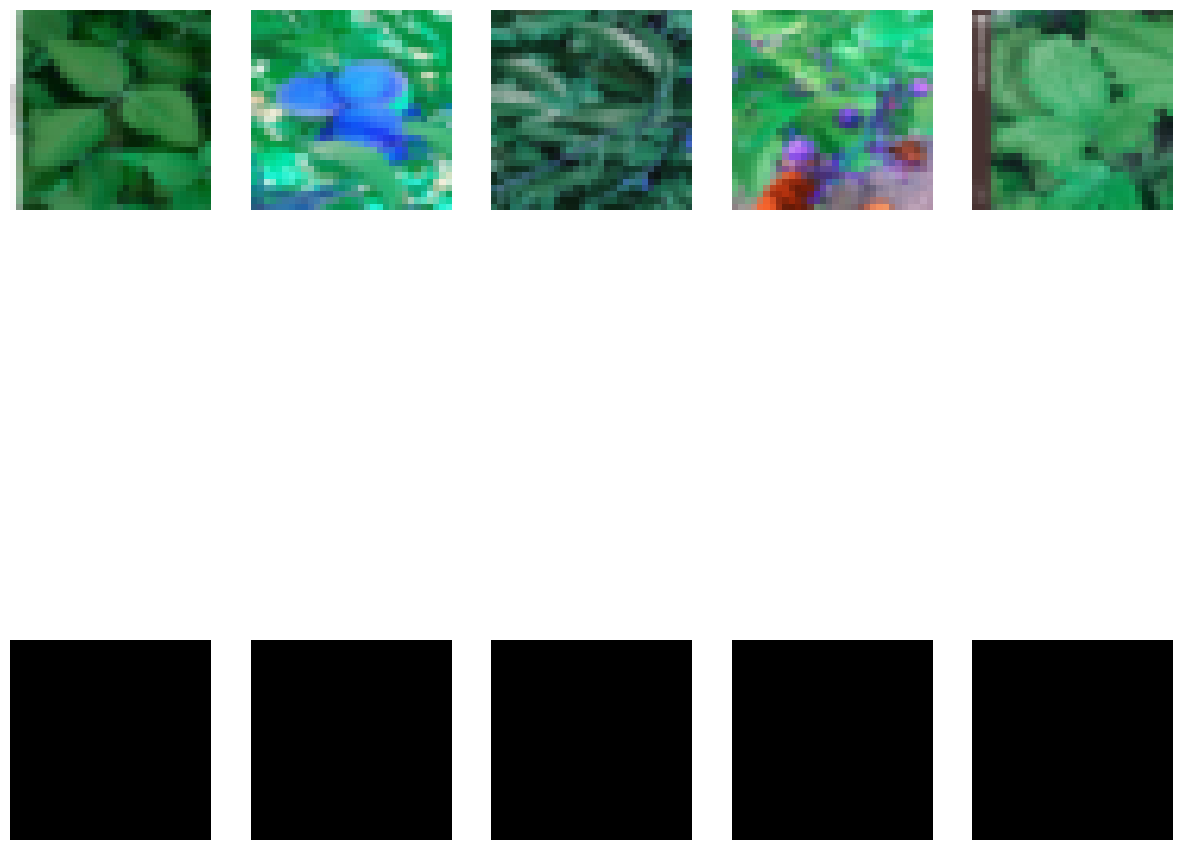

In [6]:
# Show the resized images
fig, axs = plt.subplots(2, 5, figsize=(15, 15))
for i in range(5):
    axs[0, i].imshow(left_images_resized[i])
    axs[0, i].axis('off')
    axs[1, i].imshow(right_images_resized[i])
    axs[1, i].axis('off')
plt.show()


Now flattening the 3D matrix to a 1D vector

In [7]:
#NOw flatten the resized images
left_images_flattened=left_images_resized.reshape(len(left_images_resized),-1)
right_images_flattened=right_images_resized.reshape(len(right_images_resized),-1)

print("Shape of flattened left images numpy array:", left_images_flattened.shape)
print("Shape of flattened right images numpy array:", right_images_flattened.shape)


Shape of flattened left images numpy array: (919, 3072)
Shape of flattened right images numpy array: (919, 3072)


Now normalizing the flattened vectors to have zero mean and unit variance

In [8]:
#Now normalize the flattened images to have mena 0 and std 1
print(np.mean(left_images_flattened,axis=0))
print(np.std(left_images_flattened,axis=0))

left_images_normalized=(left_images_flattened-np.mean(left_images_flattened,axis=0))/np.std(left_images_flattened,axis=0)

print("Shape of normalized left images numpy array:", left_images_normalized.shape)
#print("Shape of normalized right images numpy array:", right_images_normalized.shape)

#print the mean and std of the normalized images
print("Mean of normalized left images:", np.mean(left_images_normalized,axis=0))
print("Std of normalized left images:", np.std(left_images_normalized,axis=0))
#print("Mean of normalized right images:", np.mean(right_images_normalized))
#print("Std of normalized right images:", np.std(right_images_normalized))


[0.41636621 0.51676009 0.47417417 ... 0.44937761 0.55310814 0.49956742]
[0.32947651 0.29971133 0.31915382 ... 0.35039448 0.3070009  0.3290843 ]
Shape of normalized left images numpy array: (919, 3072)
Mean of normalized left images: [-1.58741355e-16  1.46684744e-15  8.61600719e-16 ...  7.67129076e-16
  3.20678075e-15  3.96309753e-16]
Std of normalized left images: [1. 1. 1. ... 1. 1. 1.]


In [9]:
X=(1/len(left_images_normalized)) * (left_images_normalized.T @ left_images_normalized)
print("The Shape of Covariance matrix is: ",X.shape)
print("The Covariance Matrix is: ",X)

The Shape of Covariance matrix is:  (3072, 3072)
The Covariance Matrix is:  [[1.         0.9053606  0.89967079 ... 0.60939979 0.53731308 0.53963329]
 [0.9053606  1.         0.94037872 ... 0.51982813 0.52431664 0.52205008]
 [0.89967079 0.94037872 1.         ... 0.51880969 0.51208164 0.56365387]
 ...
 [0.60939979 0.51982813 0.51880969 ... 1.         0.91210888 0.90789343]
 [0.53731308 0.52431664 0.51208164 ... 0.91210888 1.         0.93939854]
 [0.53963329 0.52205008 0.56365387 ... 0.90789343 0.93939854 1.        ]]


In [10]:
#Now find the eigen values and eigen vectors
eigen_values, eigen_vectors = np.linalg.eig(X)
print("Eigen Values: ",eigen_values)
print()
print("Eigen Vectors: ",eigen_vectors)

Eigen Values:  [1.28493181e+03+0.00000000e+00j 1.94749480e+02+0.00000000e+00j
 1.14588563e+02+0.00000000e+00j ... 1.36200729e-16-4.91308576e-17j
 3.74043377e-16+0.00000000e+00j 1.50935817e-16+0.00000000e+00j]

Eigen Vectors:  [[ 1.97890141e-02+0.j         -1.20058523e-02+0.j
   1.96481767e-02+0.j         ...  9.01353841e-03+0.01506743j
   4.75482774e-03+0.j          1.56307495e-03+0.j        ]
 [ 1.83841078e-02+0.j         -1.30501461e-02+0.j
   1.67870051e-02+0.j         ...  2.84104118e-04+0.00055242j
   2.28645714e-04+0.j          8.82794250e-05+0.j        ]
 [ 1.87060931e-02+0.j         -1.47487793e-02+0.j
   1.35120196e-02+0.j         ...  1.27174489e-03+0.00199559j
   8.57419392e-05+0.j          2.00443641e-04+0.j        ]
 ...
 [ 2.25333621e-02+0.j         -1.19499448e-02+0.j
  -7.72515326e-03+0.j         ...  3.94107088e-03-0.00029872j
   2.10657904e-02+0.j         -3.16227338e-03+0.j        ]
 [ 2.14740778e-02+0.j         -1.28230199e-02+0.j
  -1.31567802e-02+0.j         ...  

In [11]:
#Now sort the eigen values and eigen vectors
sorted_indices = np.argsort(eigen_values)[::-1]
print(sorted_indices)
sorted_eigen_values = eigen_values[sorted_indices]
sorted_eigen_vectors = eigen_vectors[:, sorted_indices]
print("Sorted Eigen Values: ",sorted_eigen_values)
print("Sorted Eigen Vectors: ",sorted_eigen_vectors)
print("Number of Eigen Values: ",len(sorted_eigen_values))
print("Shape of Eigen Vectors: ",sorted_eigen_vectors.shape)

[  0   1   2 ... 923 928 918]
Sorted Eigen Values:  [ 1.28493181e+03+0.00000000e+00j  1.94749480e+02+0.00000000e+00j
  1.14588563e+02+0.00000000e+00j ... -1.54059030e-14-4.97137838e-15j
 -1.56191108e-14+0.00000000e+00j -2.08542493e-14+0.00000000e+00j]
Sorted Eigen Vectors:  [[ 0.01978901+0.j         -0.01200585+0.j          0.01964818+0.j
  ...  0.00410713+0.0083327j   0.00351043+0.j
   0.01607589+0.j        ]
 [ 0.01838411+0.j         -0.01305015+0.j          0.01678701+0.j
  ... -0.00091111+0.00523444j  0.00396732+0.j
   0.01065187+0.j        ]
 [ 0.01870609+0.j         -0.01474878+0.j          0.01351202+0.j
  ... -0.0064974 -0.01794855j -0.02155235+0.j
  -0.00261421+0.j        ]
 ...
 [ 0.02253336+0.j         -0.01194994+0.j         -0.00772515+0.j
  ...  0.04666858-0.02349971j -0.02677863+0.j
   0.05139299+0.j        ]
 [ 0.02147408+0.j         -0.01282302+0.j         -0.01315678+0.j
  ... -0.01622823-0.00576535j  0.02105623+0.j
  -0.03751969+0.j        ]
 [ 0.02222291+0.j        

In [12]:
#Now reconstruct the matrix using the first k eigen vectors
num_eigenvals=100
Reconstruct_images=np.zeros((sorted_eigen_vectors.shape[0],sorted_eigen_vectors.shape[0]))
print(Reconstruct_images.shape)

Reconstruct_images += sorted_eigen_vectors[:, :num_eigenvals].real @ np.diag(sorted_eigen_values[:num_eigenvals].real) @ sorted_eigen_vectors[:, :num_eigenvals].real.T
    
print("The Reconstructed matrix is: ",Reconstruct_images)    


(3072, 3072)
The Reconstructed matrix is:  [[0.91745544 0.8527844  0.84783574 ... 0.61010993 0.54343832 0.5455869 ]
 [0.8527844  0.90329227 0.87274304 ... 0.51982756 0.52457464 0.5197403 ]
 [0.84783574 0.87274304 0.90668865 ... 0.52405878 0.51496033 0.56458188]
 ...
 [0.61010993 0.51982756 0.52405878 ... 0.9000674  0.83909079 0.84061172]
 [0.54343832 0.52457464 0.51496033 ... 0.83909079 0.87805331 0.8512257 ]
 [0.5455869  0.5197403  0.56458188 ... 0.84061172 0.8512257  0.90049809]]


In [13]:
print(left_images_flattened.shape)
print(sorted_eigen_vectors.shape)

proj_matrix=left_images_flattened @ sorted_eigen_vectors[:,:num_eigenvals].real
print(proj_matrix)
print(proj_matrix.shape)


(919, 3072)
(3072, 3072)
[[ 1.33408681e+01  3.95424146e+00  4.70704182e-01 ... -7.72987801e-02
  -1.26422518e-01 -1.60424687e-01]
 [ 2.40211953e+01  8.30398299e+00 -5.02569507e+00 ...  9.12956884e-01
  -5.36980799e-01 -6.41852179e-01]
 [ 1.46924893e+01  5.46999381e+00 -1.06444523e+00 ... -3.53856290e-01
  -4.79925243e-01 -2.70808271e-01]
 ...
 [ 2.16898922e+01  5.48579135e+00 -3.03731615e+00 ... -2.36266177e-01
  -2.14970948e-02  7.92216011e-02]
 [ 2.12291852e+01  9.52081568e+00 -6.28382190e+00 ...  7.30288192e-02
  -2.11882253e-01 -1.12044722e-01]
 [ 1.94881816e+01  5.02111050e+00 -6.93311425e+00 ...  5.59875106e-01
   1.36148708e-01  4.59940840e-01]]
(919, 100)


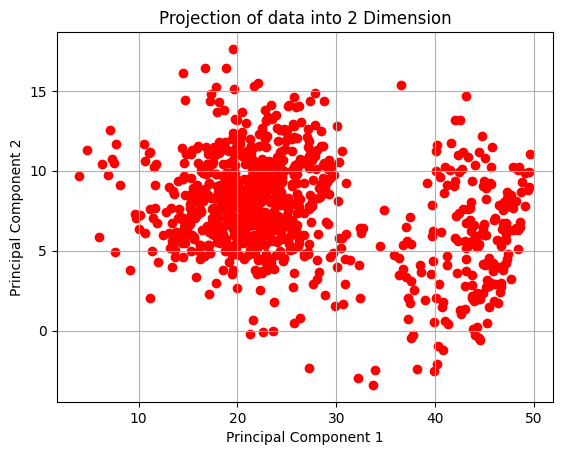

In [14]:
plt.scatter(proj_matrix[:,0],proj_matrix[:,1],color='r')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Projection of data into 2 Dimension')
plt.grid()
plt.show()

In [15]:
variance=(np.linalg.norm(proj_matrix,ord=2,axis=1))
#print(variance)
print("Variance in data on choosing",num_eigenvals,"eigen values is: ",np.sum(variance))

Variance in data on choosing 100 eigen values is:  27015.819008897837


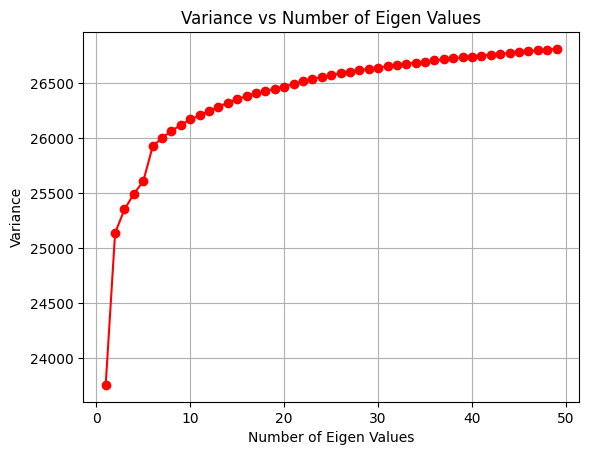

In [16]:
variances=[]
for num_eigenvals in range(1,50):
    proj_matrix=left_images_flattened @ sorted_eigen_vectors[:,:num_eigenvals].real
    variance=(np.linalg.norm(proj_matrix,ord=2,axis=1))
    variances.append(np.sum(variance))
    
plt.plot(range(1,50),variances,color='r',marker='o')
plt.xlabel('Number of Eigen Values')
plt.ylabel('Variance')
plt.title('Variance vs Number of Eigen Values')
plt.grid()
plt.show()

    
    

Thus from the graph we can choose the required number of Eigen values based upon the value of variance we want the data to account for. Thus clearly choosing two Eigen values is sufficient as we see an elbow in the increase in variance at two eigen values.